In [14]:
#load data
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_college_football_week():
    # Define the start date of the college football season
    start_date = datetime(2023, 8, 26) 

    # Get the current date
    current_date = datetime.today()

    # Calculate the difference in days from the start date
    days_difference = (current_date - start_date).days

    # Calculate the week based on a 7-day week
    college_football_week = (days_difference // 7) + 1
    
    if college_football_week>16:
        college_football_week=16
        

    return college_football_week-1

In [3]:
#read data with Pandas from CSV file

NCAA_df = pd.read_csv("data/defense.csv")

In [4]:
#see a few data
NCAA_df.head()

,Player,School,POS,SOLO,AST,TOT,SACK,YDS,PD,INT,LNG,TD,FF
0,Jason Henderson,ODU,LB,41,98,139,4.0,23,0,0,0,0,0
1,Tyrice Knight,UTEP,LB,71,45,116,3.5,0,5,0,0,0,0
2,Jay Higgins,IOWA,LB,49,64,113,1.0,15,2,1,0,0,1
3,Joe Sparacio,EMU,LB,45,61,106,2.0,0,2,0,0,0,2
4,Payton Wilson,NCSU,LB,48,57,105,4.0,2,5,2,15,1,0


In [5]:


# Group the data by 'School' and sum the 'SOLO' column for each group
school_solo_totals = NCAA_df.groupby('School')['SOLO'].sum().reset_index()

# Sort the result in descending order by the 'SOLO' column
school_solo_totals = school_solo_totals.sort_values(by='SOLO', ascending=False)

# Display the total number of solo tackles by school (from most to least)
print(school_solo_totals)

    School  SOLO
115    USC   440
23    COLO   431
44    JVST   409
108     UL   399
104    UCF   386
..     ...   ...
124     VT   262
66    NCSU   261
117    USM   256
57    MICH   242
74    OHIO   217

[133 rows x 2 columns]


In [6]:
#put this in a bell curve
# Group the data by 'School' and sum the 'TOT' column for each group
school_tot_totals = NCAA_df.groupby('School')['TOT'].sum().reset_index()

# Sort the result in descending order by the 'TOT' column
school_tot_totals = school_tot_totals.sort_values(by='TOT', ascending=False)

# Display the total number of tackles by school (from most to least)
print(school_tot_totals)

    School  TOT
73     ODU  823
25     CSU  781
44    JVST  735
109    ULM  724
123    VAN  717
..     ...  ...
20    CLEM  504
11     BAY  502
57    MICH  500
81     PSU  482
106    UGA  447

[133 rows x 2 columns]


(array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([447. , 484.6, 522.2, 559.8, 597.4, 635. , 672.6, 710.2, 747.8,
        785.4, 823. ]),
 <BarContainer object of 10 artists>)

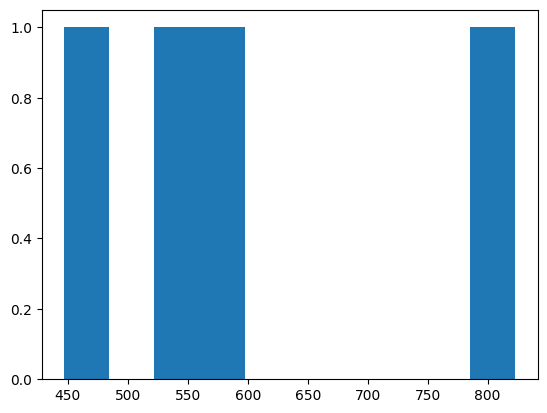

In [12]:


# Display the plot
plt.hist(school_tot_totals['TOT'])

/tmp/ipykernel_1747/4189999064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(school_tot_totals['TOT'])


<Axes: xlabel='TOT', ylabel='Density'>

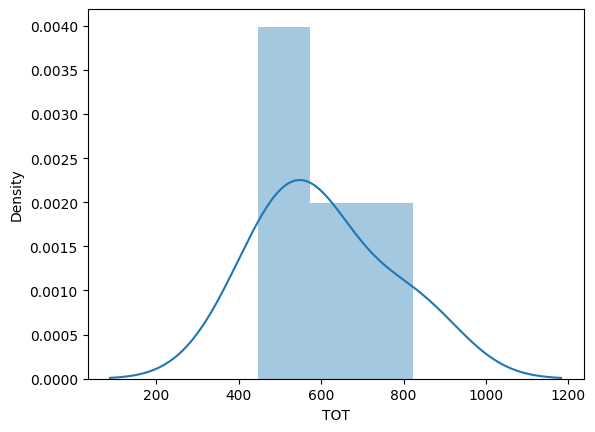

In [19]:
sns.distplot(school_tot_totals['TOT'])

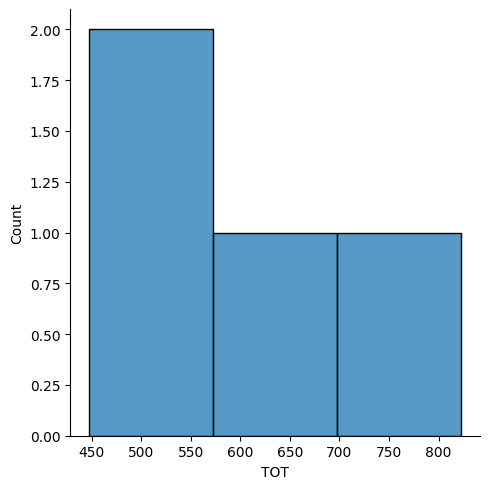

In [20]:
sns.displot(school_tot_totals['TOT'])

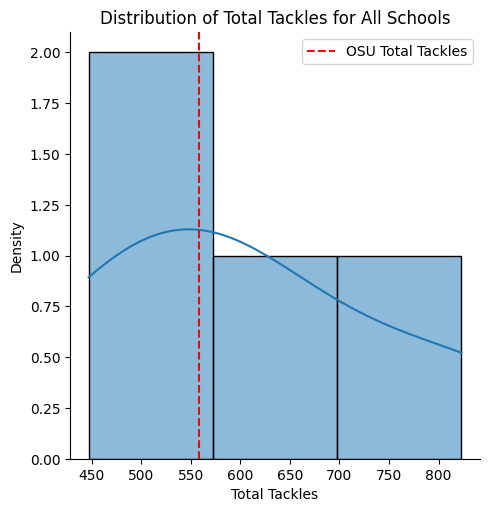

In [21]:
# Create a distribution plot
sns.displot(school_tot_totals['TOT'], kde=True)

# Find and set the total tackles for OSU
osu_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'OSU', 'TOT'].values[0]

# Add a vertical line for OSU's total tackles
plt.axvline(x=osu_total_tackles, color='red', linestyle='--', label='OSU Total Tackles')

# Add labels and title
plt.xlabel('Total Tackles')
plt.ylabel('Density')
plt.title('Distribution of Total Tackles for All Schools')

# Show a legend
plt.legend()

# Display the plot
plt.show()

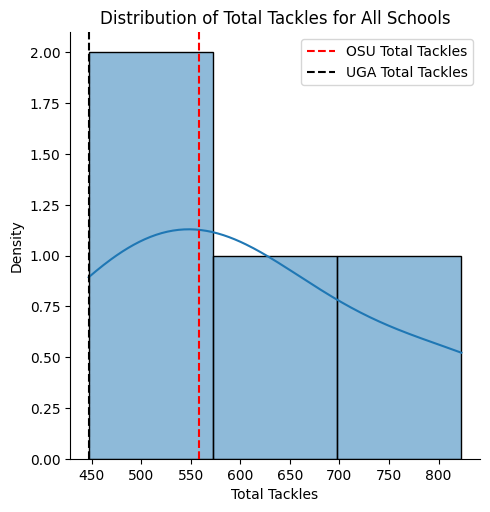

In [25]:

# Create a distribution plot
sns.displot(school_tot_totals['TOT'], kde=True)

# Find and set the total tackles for OSU and UGA
osu_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'OSU', 'TOT'].values[0]
uga_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'UGA', 'TOT'].values[0]


# Add vertical lines for OSU and UGA's total tackles
plt.axvline(x=osu_total_tackles, color='red', linestyle='--', label='OSU Total Tackles')
plt.axvline(x=uga_total_tackles, color='Black', linestyle='--', label='UGA Total Tackles')

# Add labels and title
plt.xlabel('Total Tackles')
plt.ylabel('Density')
plt.title('Distribution of Total Tackles for All Schools')

# Show a legend
plt.legend()

# Display the plot
plt.show()

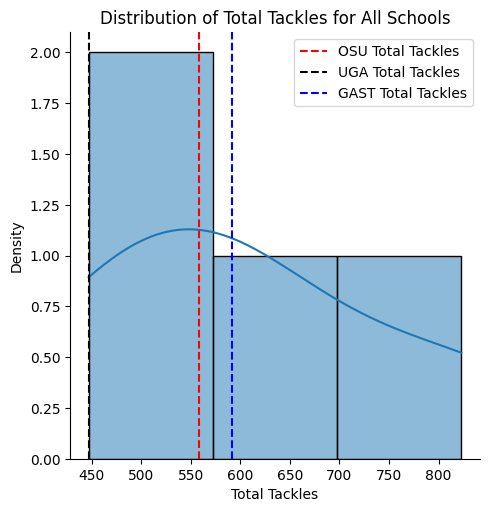

In [24]:
# Create a distribution plot
sns.displot(school_tot_totals['TOT'], kde=True)

# Find and set the total tackles for OSU and UGA
osu_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'OSU', 'TOT'].values[0]
uga_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'UGA', 'TOT'].values[0]
gast_total_tackles = school_tot_totals.loc[school_tot_totals['School'] == 'GAST', 'TOT'].values[0]

# Add vertical lines for OSU and UGA's total tackles
plt.axvline(x=osu_total_tackles, color='red', linestyle='--', label='OSU Total Tackles')
plt.axvline(x=uga_total_tackles, color='Black', linestyle='--', label='UGA Total Tackles')
plt.axvline(x=gast_total_tackles, color='Blue', linestyle='--', label='GAST Total Tackles')

# Add labels and title
plt.xlabel('Total Tackles')
plt.ylabel('Density')
plt.title('Distribution of Total Tackles for All Schools')

# Show a legend
plt.legend()

# Display the plot
plt.show()

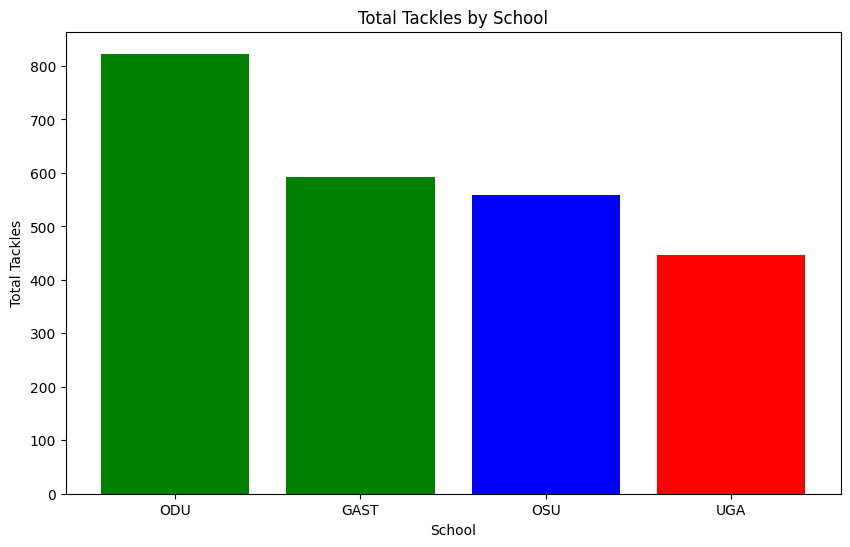

In [8]:
# Filter the data for specific schools (ODU, GAST, UGA, OSU)
selected_schools = ['ODU', 'GAST', 'UGA', 'OSU']
filtered_data = NCAA_df[NCAA_df['School'].isin(selected_schools)]

# Group the filtered data by 'School' and sum the 'TOT' column for each group
school_tot_totals = filtered_data.groupby('School')['TOT'].sum().reset_index()

# Sort the result in descending order by the 'TOT' column
school_tot_totals = school_tot_totals.sort_values(by='TOT', ascending=False)

# Calculate the TOT value for OSU
osu_tot = school_tot_totals[school_tot_totals['School'] == 'OSU']['TOT'].values[0]

# Define a function to determine the color based on the difference in TOT
def get_color(tot, selected_tot):
    if tot == selected_tot:
        return 'blue'  # Selected team is blue
    elif tot > selected_tot:
        return 'green'  # Teams with more tackles than the selected team
    else:
        return 'red'  # Teams with fewer tackles than the selected team

# Create a list of colors based on the difference in TOT
colors = [get_color(tot, osu_tot) for tot in school_tot_totals['TOT']]

# Create a bar graph with color-coded bars
plt.figure(figsize=(10, 6))
plt.bar(school_tot_totals['School'], school_tot_totals['TOT'], color=colors)
plt.xlabel('School')
plt.ylabel('Total Tackles')
plt.title('Total Tackles by School')

plt.show()

In [10]:
# Group the data by 'School' and sum the 'SACK' column for each group
school_sack_totals = NCAA_df.groupby('School')['SACK'].sum().reset_index()

# Sort the result in descending order by the 'SACK' column
school_sack_totals = school_sack_totals.sort_values(by='SACK', ascending=False)

# Display the total number of sacks by school (from most to least)
print(school_sack_totals)

    School  SACK
43     JMU  41.0
81     PSU  38.0
92    TA&M  34.0
105   UCLA  34.0
44    JVST  33.0
..     ...   ...
24    CONN  11.0
112    UNM   9.0
45    KENT   9.0
122    UVA   8.0
16     BYU   8.0

[133 rows x 2 columns]


In [11]:
# Group the data by 'School' and sum the 'INT' column for each group
school_int_totals = NCAA_df.groupby('School')['INT'].sum().reset_index()

# Sort the result in descending order by the 'INT' column
school_int_totals = school_int_totals.sort_values(by='INT', ascending=False)

# Display the total number of interceptions by school (from most to least)
print(school_int_totals)

   School  INT
48    LIB   16
79     OU   15
32   FRES   14
67     ND   14
66   NCSU   13
..    ...  ...
31    FLA    3
71   NMSU    3
8     ASU    2
4    ARIZ    2
94    TEM    1

[133 rows x 2 columns]


In [12]:
# Group the data by 'School' and sum the 'TD' column for each group
school_td_totals = NCAA_df.groupby('School')['TD'].sum().reset_index()

# Sort the result in descending order by the 'TD' column
school_td_totals = school_td_totals.sort_values(by='TD', ascending=False)

# Display the total number of interceptions by school (from most to least)
print(school_td_totals)

    School  TD
57    MICH   4
34    GASO   3
47      KU   3
20    CLEM   3
5      ARK   3
..     ...  ..
68     NEB   0
65    NAVY   0
64    MTSU   0
63     MSU   0
132    WYO   0

[133 rows x 2 columns]


In [13]:
#read data with Pandas from CSV file
NCAA_df1 = pd.read_csv(f'data/week{get_college_football_week()-1}.csv')

NCAA_df1.head()




,Team,Opo Team,Away Team,Away Team Score,Home Team,Home Team Score,PassingLeader,PassingLeaderScore,RushingLeader,RushingLeaderScore,ReceivingLeader,ReceivingLeaderScore
0,Northern Illinois,@Central Michigan,CMU,37,NIU,31,Rocky Lombardi,298,Marion Lukes,202,Trayvon Rudolph,170.0
1,Buffalo,@Toledo,TOL,31,BUFF,13,Dequan Finn,176,Peny Boone,125,Anthony Torres,84.0
2,Ball State,@Bowling Green,BGSU,24,BALL,21,Connor Bazelak,128,Terion Stewart,92,NaN,NaN
3,Kent State,@Akron,AKR,31,KENT,27,Lorenzo Lingard,106,Chrishon McCray,161,NaN,NaN
4,TCU,@Texas Tech,TTU,35,TCU,28,Josh Hoover,353,Tahj Brooks,146,Coy Eakin,78.0


In [14]:
# Filter the DataFrame to include rows where Georgia was either the Away Team or Home Team
georgia_games = NCAA_df1[(NCAA_df1['Away Team'] == 'UGA') | (NCAA_df1['Home Team'] == 'UGA')]

# Display the games in which Georgia played
georgia_games[['Away Team', 'Away Team Score', 'Home Team', 'Home Team Score']]


,Away Team,Away Team Score,Home Team,Home Team Score
10,UGA,30,MIZ,21


In [15]:
# Define the range of weeks you want to consider
start_week = 0
end_week = get_college_football_week() - 1

# Create an empty list to store DataFrames for each week
all_georgia_games = []

# Iterate through the specified weeks
for week in range(start_week, end_week + 1):
    file_path = f'data/week{week}.csv'
    # Load data for the current week with the specified encoding
    current_week_data = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Filter the games involving Georgia and append to the list
    georgia_games = current_week_data[(current_week_data['Away Team'] == 'UGA') | (current_week_data['Home Team'] == 'UGA')]
    all_georgia_games.append(georgia_games)

# Concatenate all DataFrames to create a single DataFrame
result_df = pd.concat(all_georgia_games)

# Display all Georgia games
print(result_df)

              Team     Opo Team Away Team  Away Team Score Home Team  \
24       UT Martin    @1Georgia       UGA               48       UTM   
3       Ball State    @1Georgia       UGA               45      BALL   
5   South Carolina    @1Georgia       UGA               24        SC   
5              UAB    @1Georgia       UGA               49       UAB   
7         1Georgia      @Auburn       UGA               27       AUB   
6       20Kentucky    @1Georgia       UGA               51        UK   
10        1Georgia  @Vanderbilt       UGA               37       VAN   
7         1Georgia     @Florida       UGA               43       FLA   
10      12Missouri    @2Georgia       UGA               30       MIZ   

    Home Team Score PassingLeader  PassingLeaderScore         RushingLeader  \
24                7   Carson Beck                 294        Kendall Milton   
3                 3   Carson Beck                 283  Roderick Robinson II   
5                14   Carson Beck         

In [16]:

# Calculate point difference for each game
result_df['Point Difference'] = result_df.apply(lambda row: row['Home Team Score'] - row['Away Team Score'] if row['Home Team'] == 'UGA' else row['Away Team Score'] - row['Home Team Score'], axis=1)

# Find the team Georgia played best against (maximum point difference)
best_opponent = result_df.loc[result_df['Point Difference'].idxmax()]

# Find the team Georgia played worst against (minimum point difference)
worst_opponent = result_df.loc[result_df['Point Difference'].idxmin()]

# Calculate the average point difference across all games
average_point_difference = result_df['Point Difference'].mean()

# Find the team Georgia played on average against (closest to the average point difference)
average_opponent = result_df.iloc[(result_df['Point Difference'] - average_point_difference).abs().argsort()[:1]]

# Create a DataFrame with the results
summary_df = pd.DataFrame({
    "Team": ["Georgia", best_opponent['Team'], worst_opponent['Team'], average_opponent['Team'].values[0]],
    "Point Difference": [0, best_opponent['Point Difference'], worst_opponent['Point Difference'], average_opponent['Point Difference'].values[0]]
})

# Display the summary
print(summary_df)

                                                Team  \
0                                            Georgia   
1                                         Ball State   
2  7    1Georgia
7    1Georgia
Name: Team, dtype:...   
3                                           1Georgia   

                                    Point Difference  
0                                                  0  
1                                                 42  
2  7     7
7    23
Name: Point Difference, dtype:...  
3                                                 23  


In [17]:
#overall stats about data
NCAA_df.describe()

,SOLO,AST,TOT,SACK,YDS,PD,INT,LNG,TD,FF
count,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000
mean,7.828066,6.419541,14.247607,0.487538,5.300524,0.723858,0.185299,2.030883,0.019686,0.161459
std,9.449557,8.260857,16.678659,1.126095,12.791386,1.475889,0.570513,8.975296,0.145286,0.461615
min,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,-10.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,10.000000,21.000000,0.500000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,71.000000,98.000000,139.000000,15.500000,167.000000,17.000000,7.000000,100.000000,2.000000,5.000000


In [75]:
#Curiosities?/Briefs?
#Who were the passengers on Titanic? (Age, gender, class ....)
#which deck were the passengers on? it is related to class?
#where they are from?
# Are they alone? Who was with the family
#what factor helped  a passenger survive?
#...

In [8]:
#DAV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Sex', ylabel='count'>

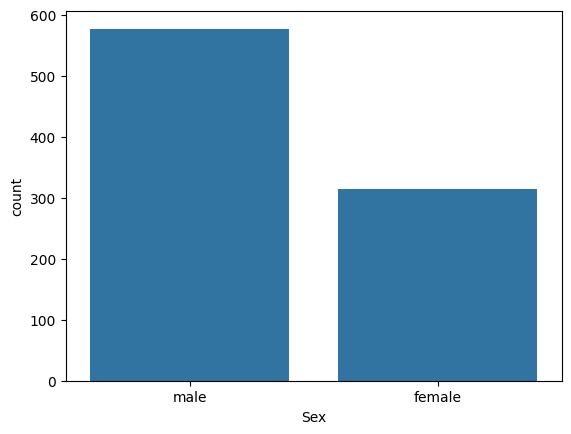

In [77]:
#passenger by gender
sns.countplot(x="Sex", data=titanic_df)

In [78]:
#Passengers by age
p_age = titanic_df["Age"].dropna() #drop nan data
p_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

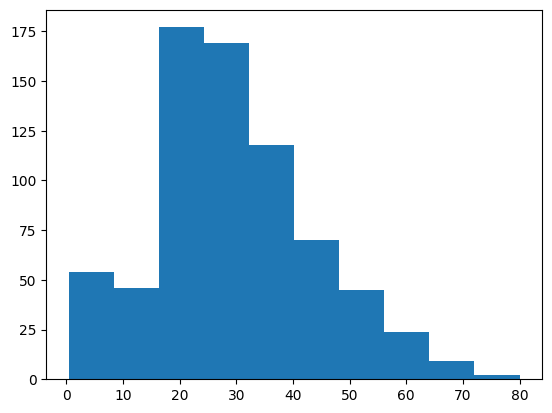

In [79]:
plt.hist(p_age)

/tmp/ipykernel_743/188081353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_age)


<Axes: xlabel='Age', ylabel='Density'>

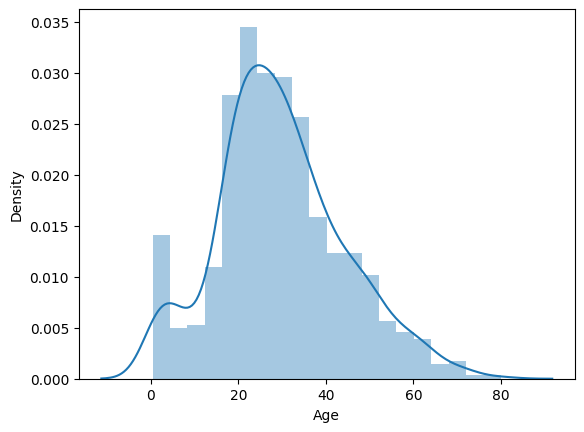

In [80]:
sns.distplot(p_age)

<Axes: xlabel='Pclass', ylabel='Survived'>

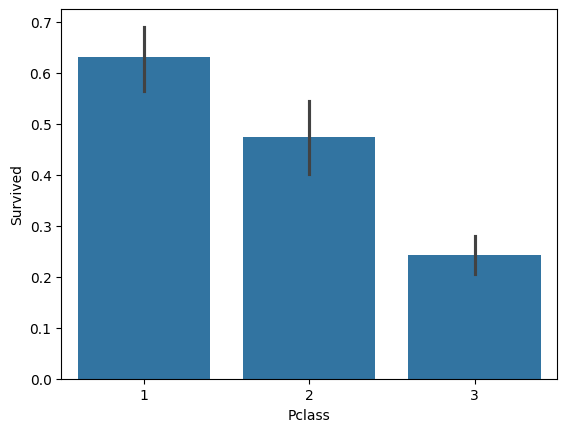

In [81]:
#is class related to survival?
sns.barplot(data=titanic_df, x='Pclass', y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

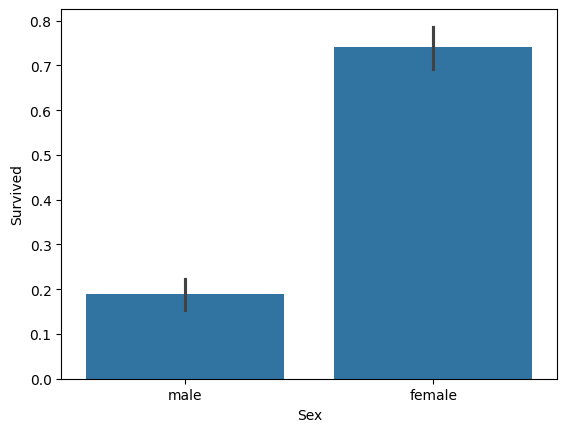

In [82]:
#gender affects survivals?
sns.barplot(data=titanic_df, x='Sex', y='Survived')

<Axes: xlabel='Sex', ylabel='count'>

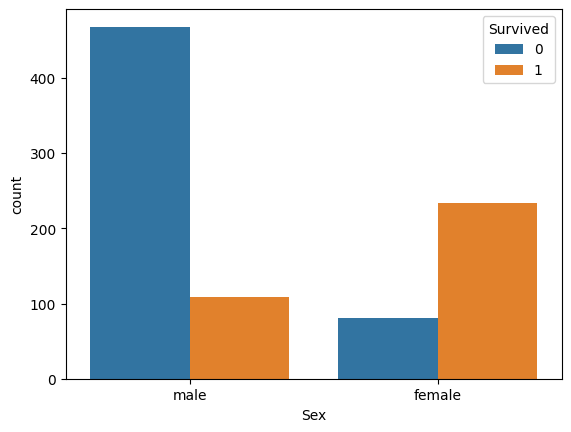

In [83]:
sns.countplot(data=titanic_df, x='Sex', hue='Survived')

/tmp/ipykernel_743/2192897197.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pm_ages["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

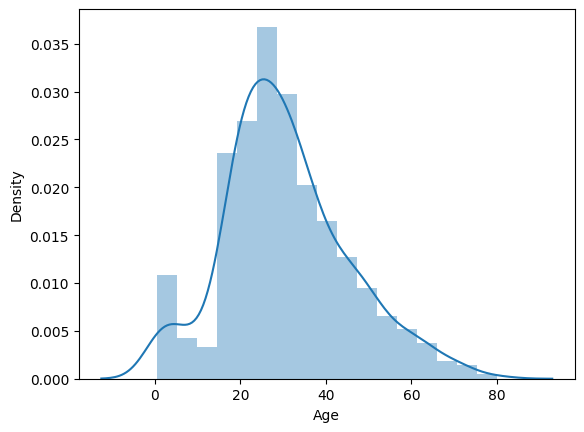

In [84]:
#age distribution
#male
pm_ages = titanic_df[titanic_df['Sex']== 'male']
sns.distplot(pm_ages["Age"].dropna())

/tmp/ipykernel_743/2222896487.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pf_ages["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

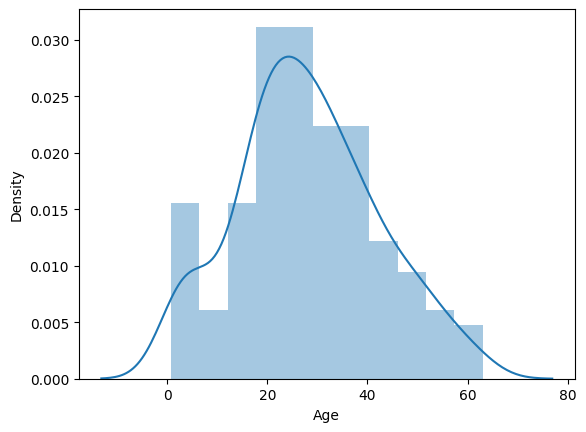

In [85]:
#age distribution
#female
pf_ages = titanic_df[titanic_df['Sex']== 'female']
sns.distplot(pf_ages["Age"].dropna())

/tmp/ipykernel_743/1710763438.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(psf_all["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

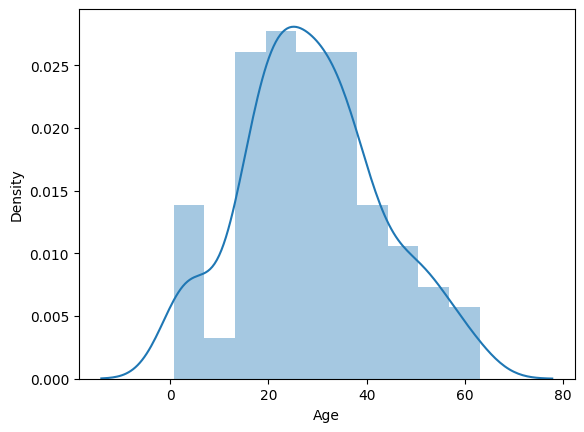

In [86]:
psf_all = titanic_df[(titanic_df['Sex']=='female')& titanic_df['Survived']==1]
sns.distplot(psf_all["Age"].dropna())

/tmp/ipykernel_743/2109708008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(psm_all["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

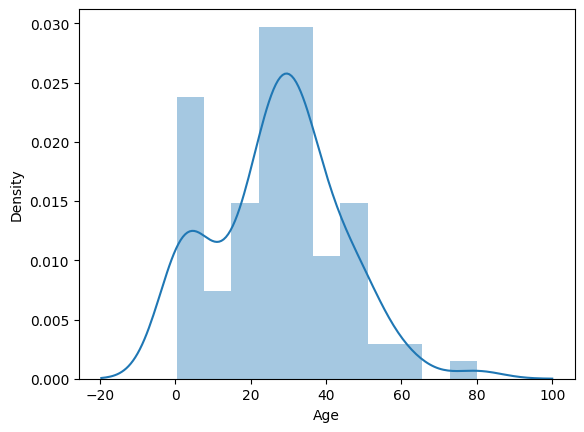

In [87]:
psm_all = titanic_df[(titanic_df['Sex']=='male')& titanic_df['Survived']==1]
sns.distplot(psm_all["Age"].dropna())

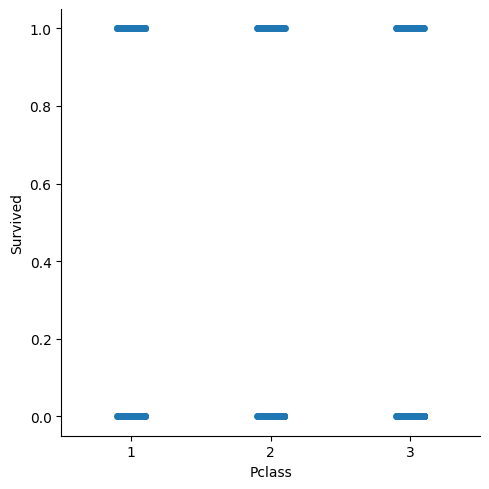

In [93]:
# how class impacts survial?
sns.catplot(x='Pclass', y='Survived', data=titanic_df)

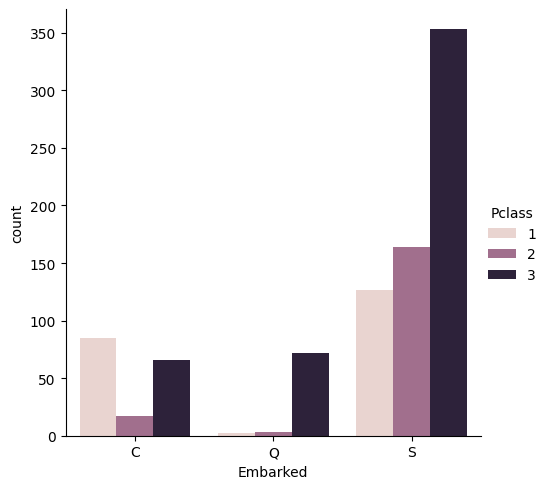

In [95]:
#where passengers are from?
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count')

In [96]:
#how about children/adult on survival?
#define child
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    

In [97]:
titanic_df['People'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,People
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


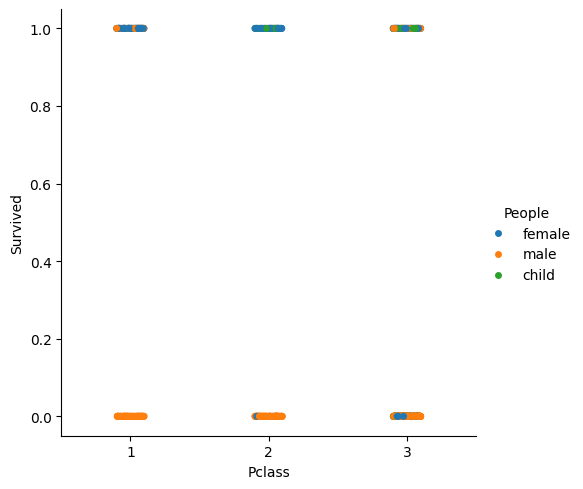

In [100]:
#survival ratio by people, class
sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='People')

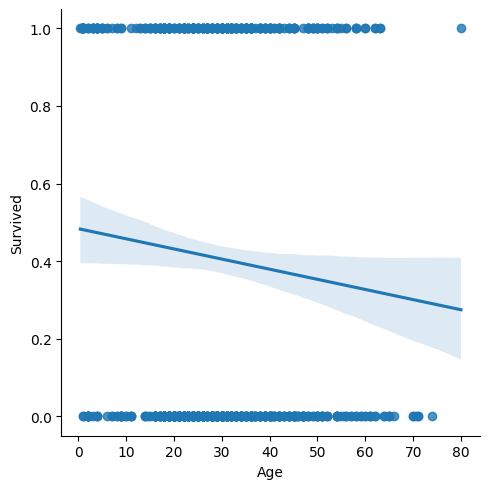

In [102]:
#how about age?
sns.lmplot(x='Age', y='Survived', data=titanic_df)

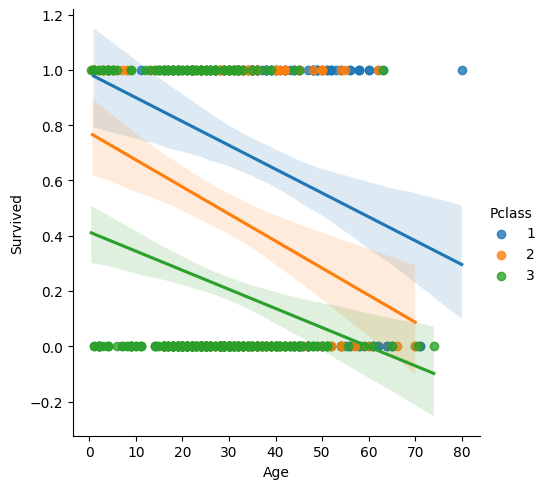

In [103]:
#how about age?
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass')

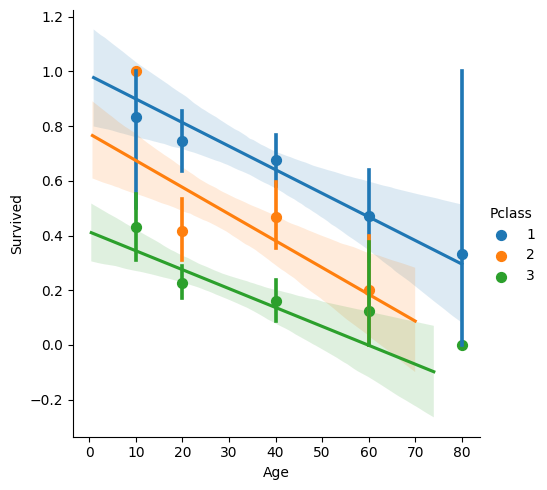

In [104]:
generations = [10, 20, 40, 60, 80] #bins
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass', x_bins=generations)

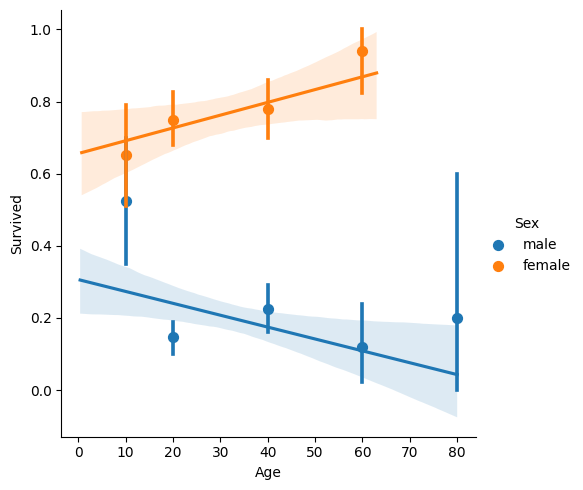

In [106]:
sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Sex', x_bins=generations)

In [107]:
#ML Data Model
import pandas as pd
import numpy as np
import random as rnd

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#crossvalidation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [108]:
#read data from files
train_df = pd.read_csv('data/titanic_train.csv')
test_df = pd.read_csv('data/titanic_test.csv')

combine = [train_df, test_df]

In [109]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
train_df = train_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
combine=[train_df, test_df]

In [111]:
#ecode sex: female : 0 and male: 1
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male': 1}).astype(int)

In [112]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [113]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [114]:
#encode embarked cat. into int
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [115]:
#handle missing value of Fare with median
#calculate median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [116]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)

In [117]:
#get train data, and calc 4 quantiles, one quarter each
train_df['Fareband'] = pd.qcut(train_df['Fare'], 4)
train_df[['Fareband', 'Survived']].groupby(['Fareband'], 
 as_index=False).mean().sort_values(by='Fareband', ascending=True)

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [118]:
#encode Fare with 0, 1, 2, and 3 in each Fareband
for dataset in combine:
    dataset.loc[dataset['Fare']<= 7.91, 'Fare']=0
    dataset.loc[(dataset['Fare']> 7.91) & 
                (dataset['Fare'] <= 14.454),'Fare']=1
    dataset.loc[(dataset['Fare']> 14.454) & 
                (dataset['Fare'] <= 31.0), 'Fare']= 2
    dataset.loc[dataset['Fare']> 31.0, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    


In [119]:
#clean Fareband col
train_df = train_df.drop(['Fareband'], axis=1)
combine = [train_df, test_df]

In [120]:
#handle missing age data
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [121]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            gender = dataset['Sex'] == i
            ppclass = dataset['Pclass'] == (j+1)
            guess_dfna = dataset[gender & ppclass]['Age']
            guess_df = guess_dfna.dropna()
            age_guess = guess_df.median()
            #convert random age float to nearest 0.5 age
            guess_ages[i, j] = (age_guess/0.5 + 0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & 
                        (dataset.Pclass == (j+1)), 'Age']=guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

In [122]:
#encode age by interval of 16
for dataset in combine:
    dataset.loc[dataset['Age'] <=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) &(dataset['Age']<=32), 'Age']=1 
    dataset.loc[(dataset['Age']>32) &(dataset['Age']<=48), 'Age']=2            
    dataset.loc[(dataset['Age']>48) &(dataset['Age']<=64), 'Age']=3  
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4


In [123]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,0
1,1,1,0,2,1,0,3,1
2,1,3,0,1,0,0,1,0
3,1,1,0,2,1,0,3,0
4,0,3,1,2,0,0,1,0


In [124]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0           0       3    1    1      1      0     0         0
 1           1       1    0    2      1      0     3         1
 2           1       3    0    1      0      0     1         0
 3           1       1    0    2      1      0     3         0
 4           0       3    1    2      0      0     1         0
 ..        ...     ...  ...  ...    ...    ...   ...       ...
 886         0       2    1    1      0      0     1         0
 887         1       1    0    1      0      0     2         0
 888         0       3    0    1      1      2     2         0
 889         1       1    1    1      0      0     2         1
 890         0       3    1    1      0      0     0         2
 
 [891 rows x 8 columns],
      Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
 0         3    1    2      0      0     0         2
 1         3    0    2      1      0     0         0
 2         2    1    3      0      0     1         2
 3   

In [125]:
#setup train data, and target output of the model
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df.copy()

In [126]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,0,0
1,1,0,2,1,0,3,1
2,3,0,1,0,0,1,0
3,1,0,2,1,0,3,0
4,3,1,2,0,0,1,0


In [127]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,0,2
1,3,0,2,1,0,0,0
2,2,1,3,0,0,1,2
3,3,1,1,0,0,1,0
4,3,0,1,1,1,1,0


In [128]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [129]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 1)
acc_log

80.2

In [130]:
#support Vector Machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 1)
acc_svc

82.7

In [132]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 1)
acc_knn

85.7

In [133]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 1)
acc_random_forest

88.6

In [134]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 1)
acc_decision_tree

88.6

In [135]:
#Naive Bayes
guassian = GaussianNB()
guassian.fit(X_train, Y_train)
Y_pred = guassian.predict(X_test)
acc_guassian = round(guassian.score(X_train, Y_train)*100, 1)
acc_guassian

77.1

In [136]:
#Compare all models
models = pd.DataFrame({'Model':['Support Vector Macine', 'KNN',
                                'Logistic Regression', 'Random Forest',
                                'Decision Tree', 'Naive Bayes'], 
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest,
                                 acc_decision_tree, acc_guassian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.6
4,Decision Tree,88.6
1,KNN,85.7
0,Support Vector Macine,82.7
2,Logistic Regression,80.2
5,Naive Bayes,77.1


In [137]:
#crossvalidation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [138]:
#Split train data with 50% each
X1, X2, Y1, Y2 = train_test_split(X_train, Y_train, 
                                  random_state = 0, train_size=0.5)

In [139]:
Y2_model = svc.fit(X1, Y1).predict(X2)
Y1_model = svc.fit(X2, Y2).predict(X1)
accuracy_score(Y1, Y1_model)

0.8179775280898877

In [140]:
#Average two models accuracy
acc_svc_avg = ((accuracy_score(Y1, Y1_model)+
                accuracy_score(Y2, Y2_model))/2)
acc_svc_avg

0.8170605129238676

In [141]:
#compute confusion matrix
cnf_matrix = confusion_matrix(Y2, Y2_model)
np.set_printoptions(precision=2)
print(cnf_matrix)

[[251  32]
 [ 50 113]]


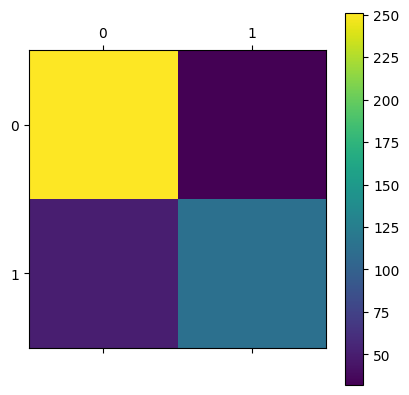

In [142]:
import matplotlib.pyplot as plt
plt.matshow(cnf_matrix)
plt.colorbar()
